In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import corner

In [2]:
# infile = 'mcmc/H0slice_10_100.pkl'
# infile = 'mcmc/test_ozstar_sbatch.pkl'
infile = 'mcmc/w32_s1000_2.pkl'
with open(infile, 'rb') as fp:
    posterior_dict = pickle.load(fp)

(7, 24800)


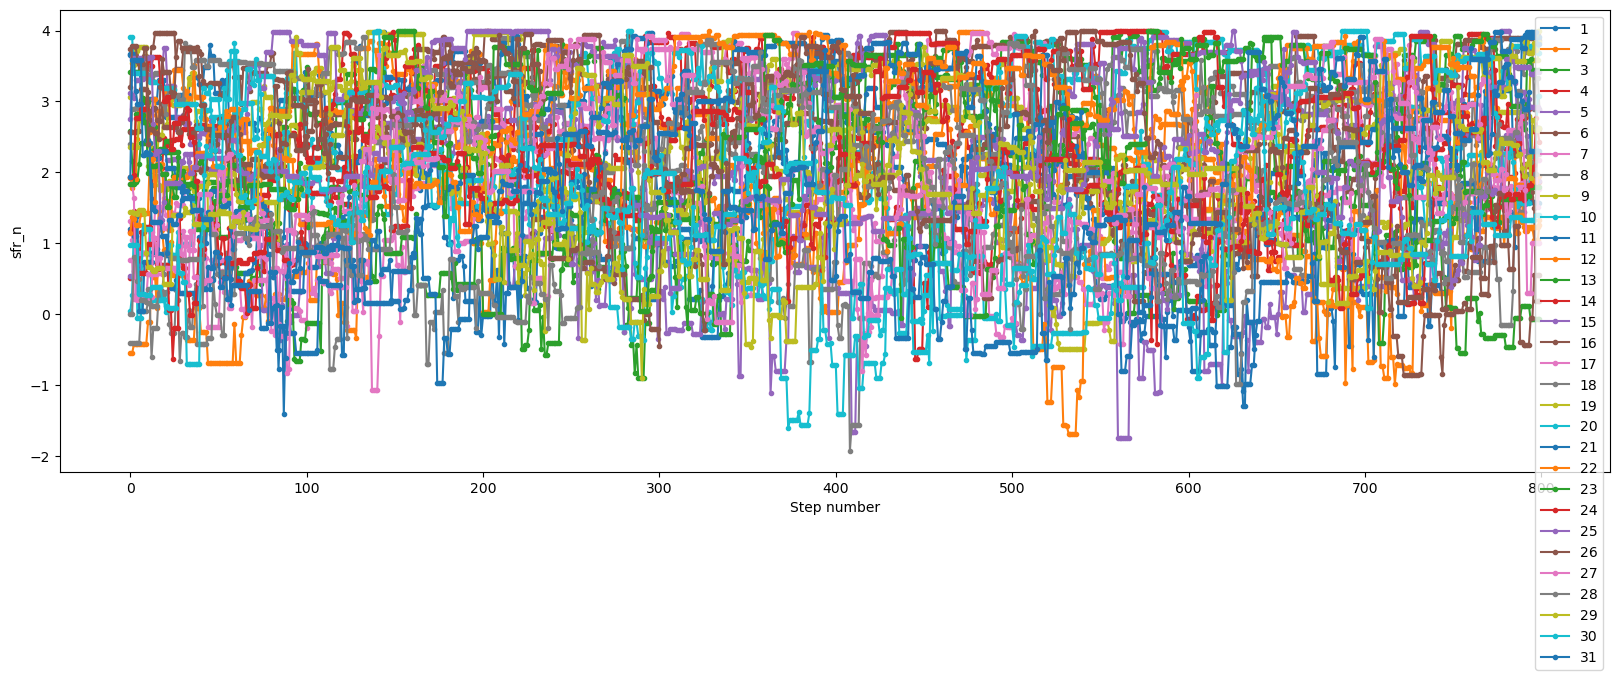

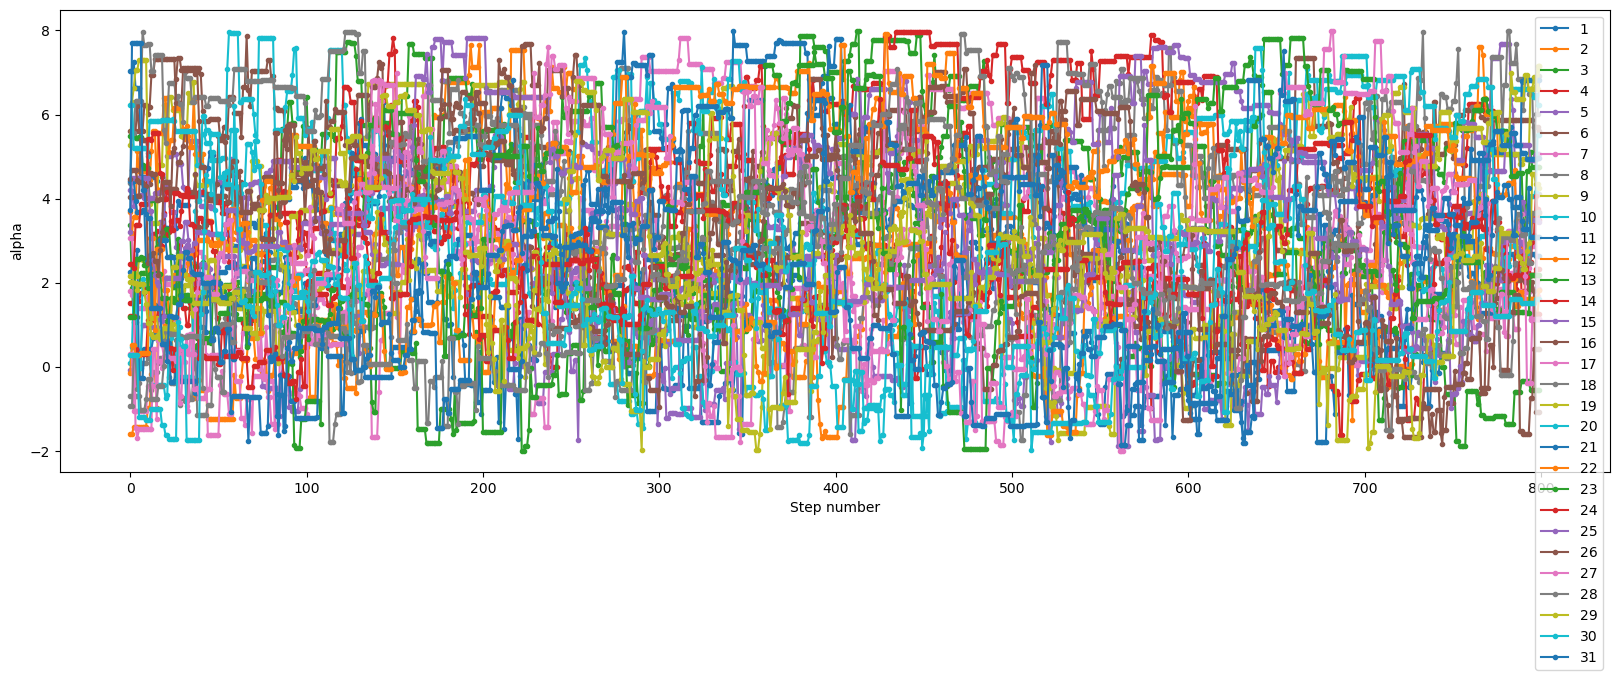

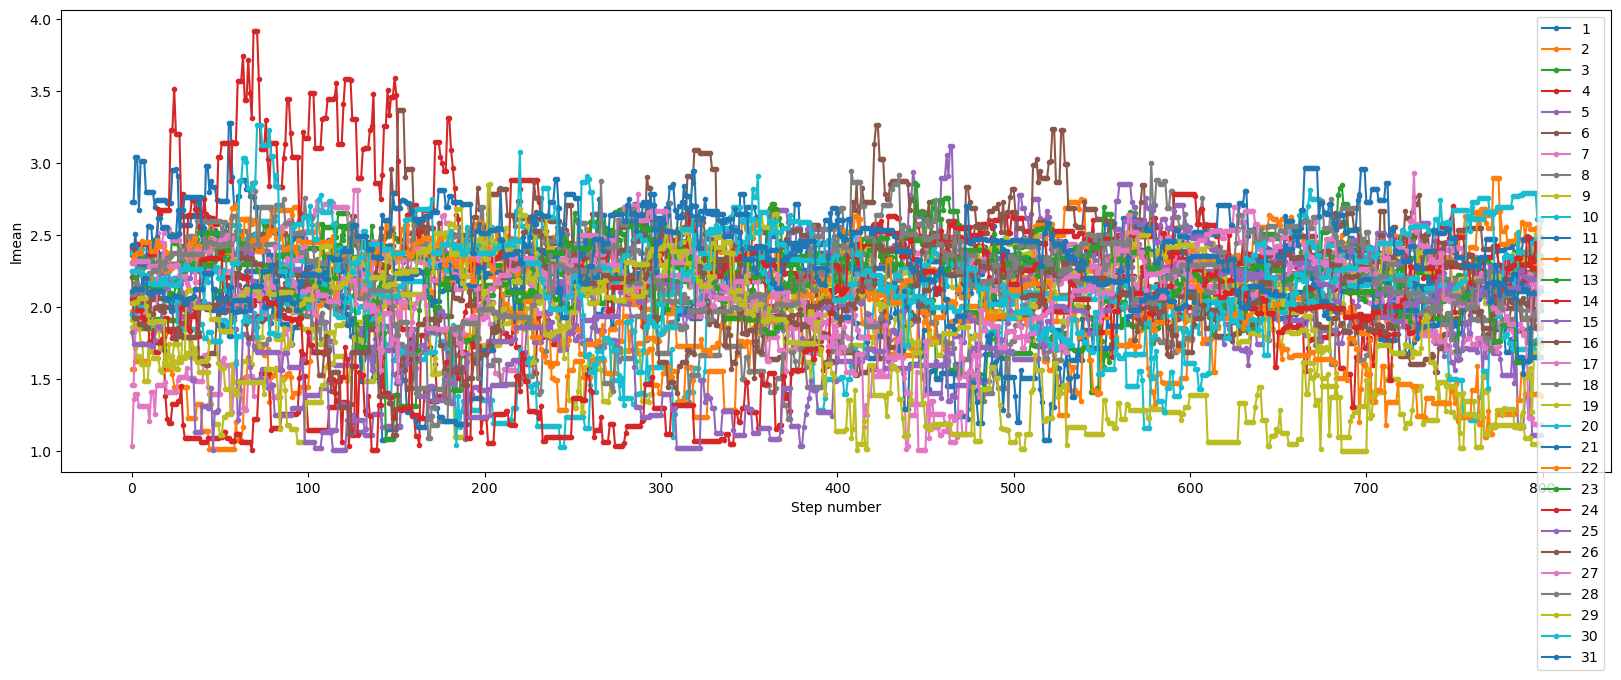

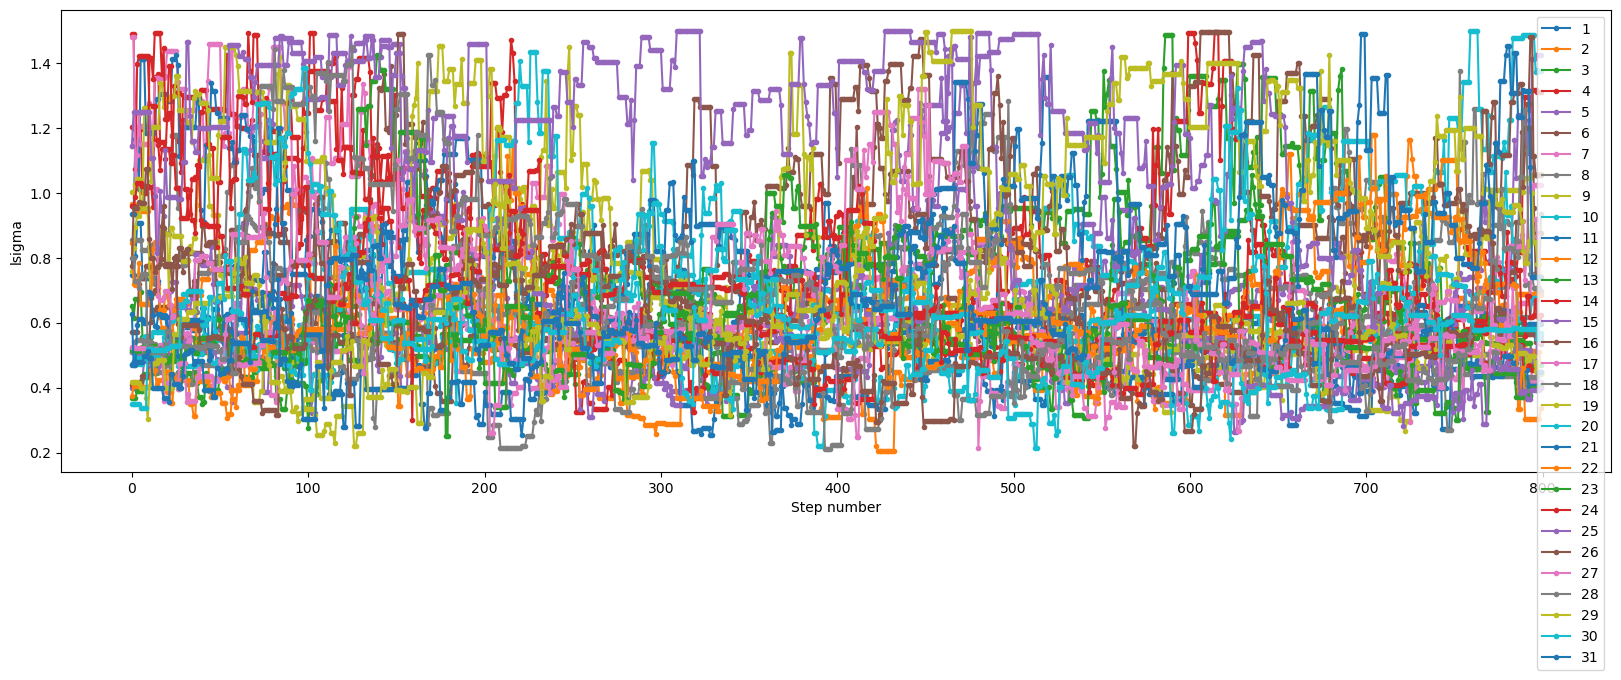

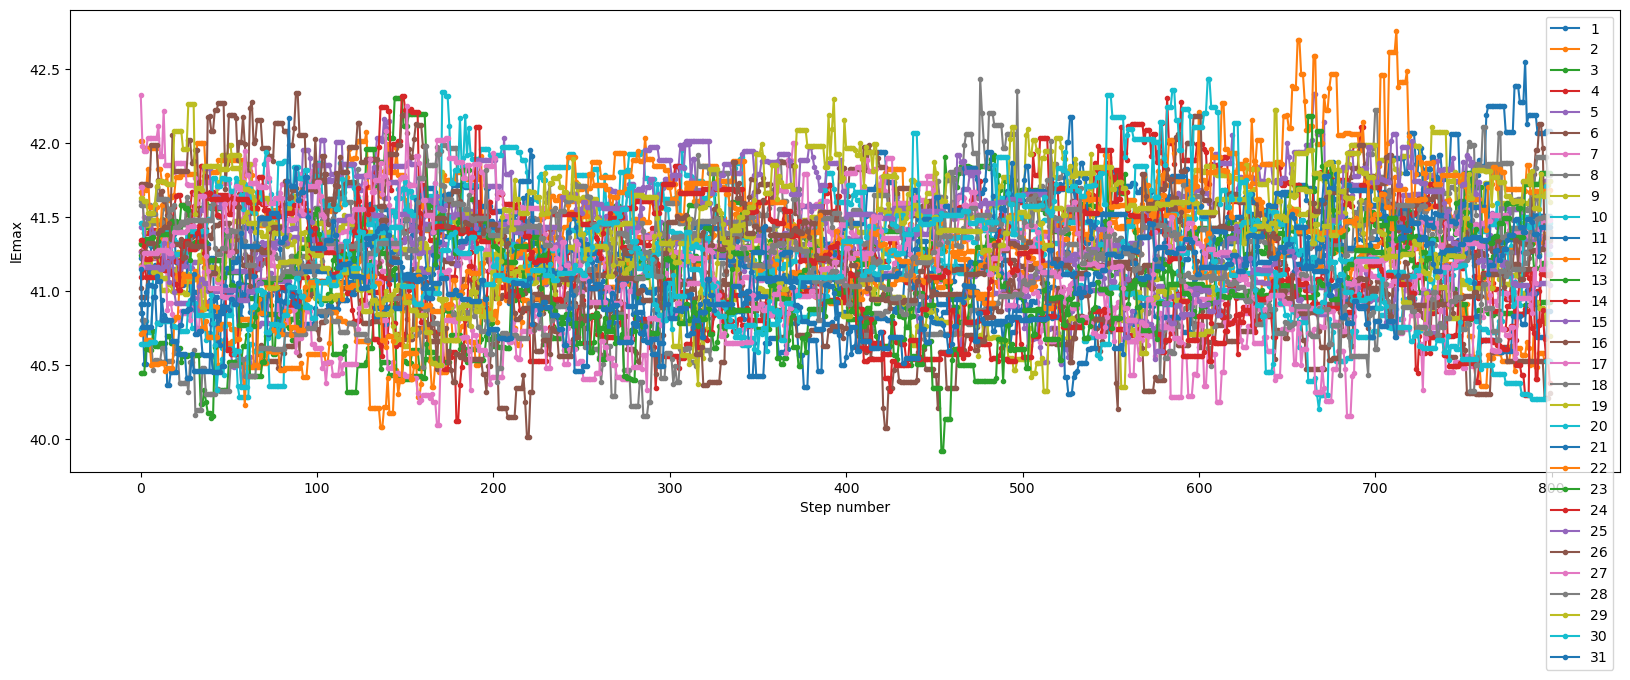

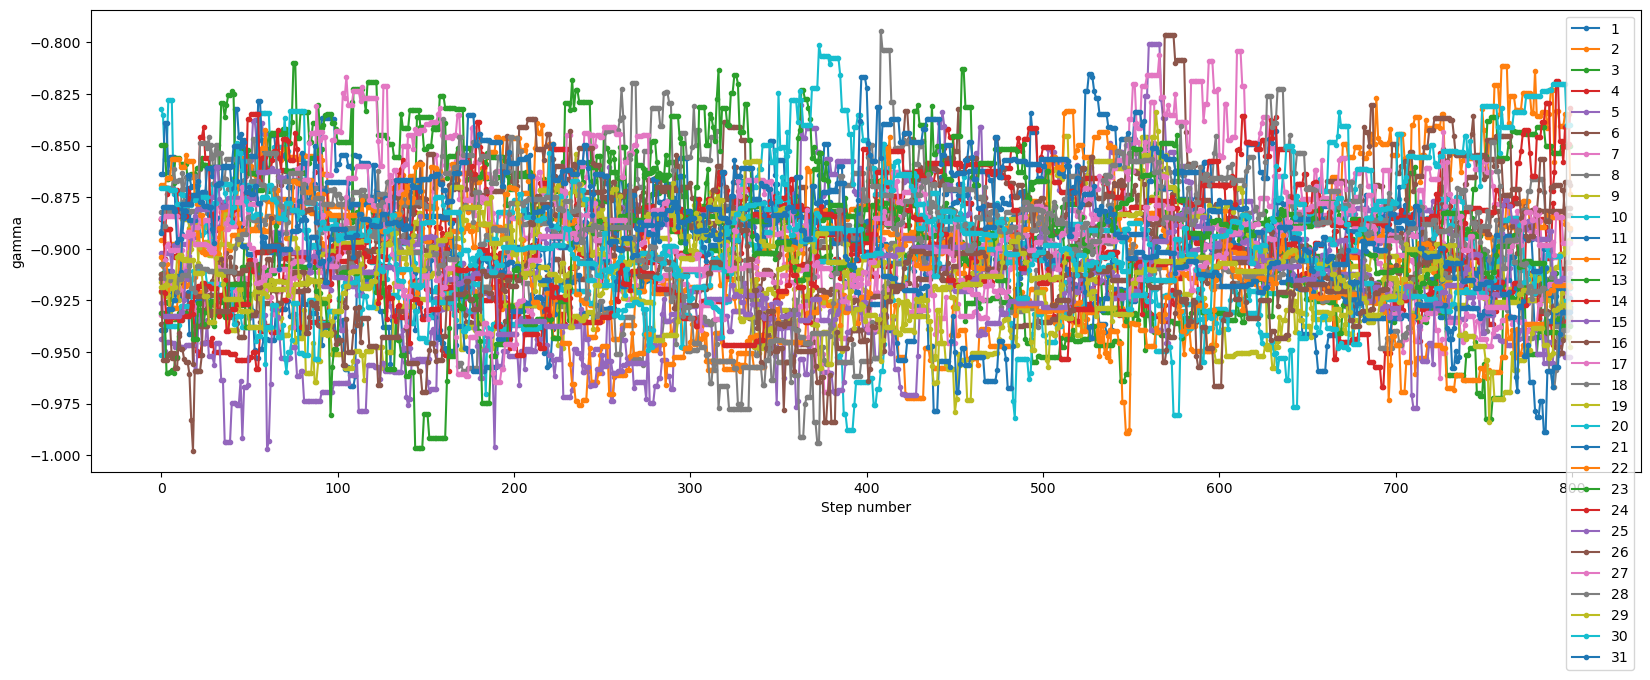

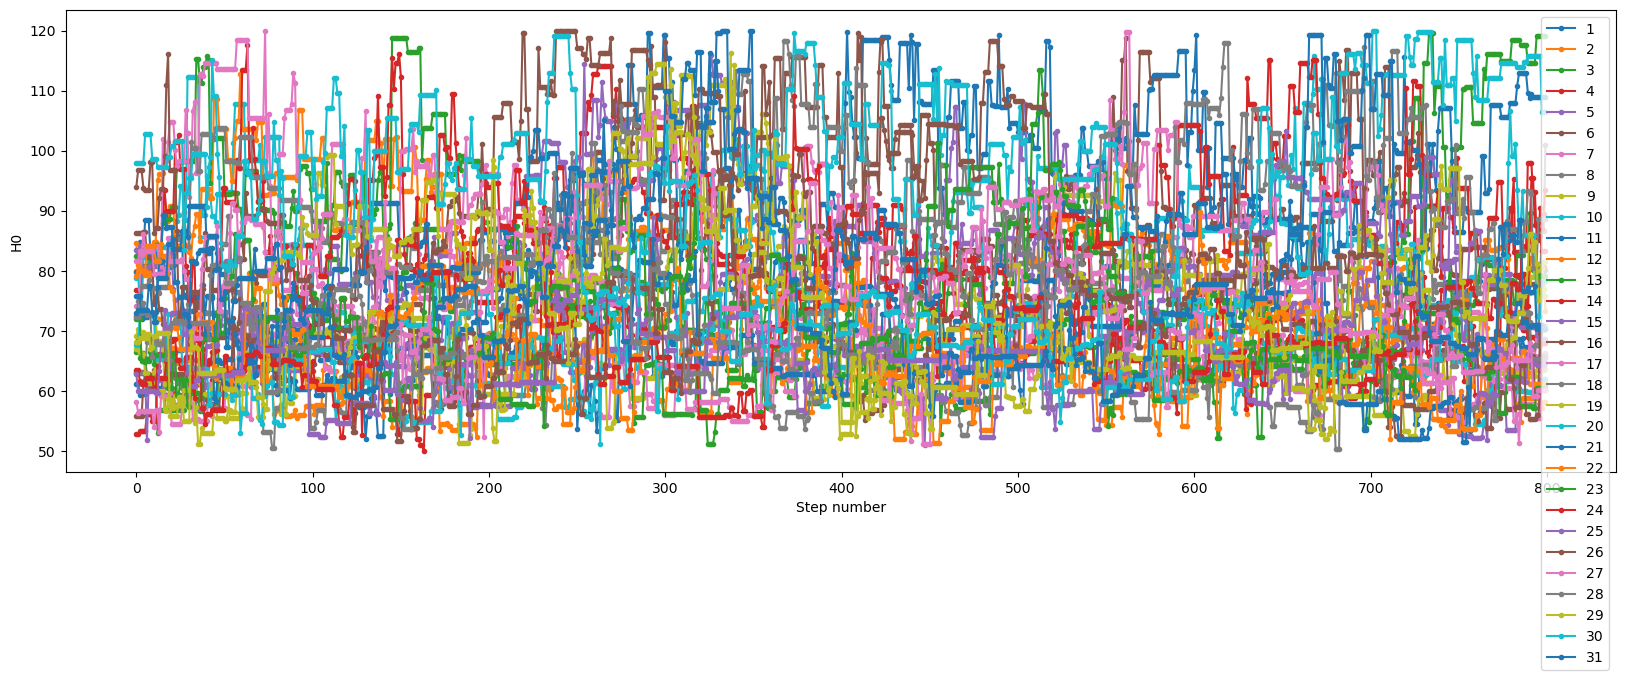

In [3]:
posterior_sample = []
labels = []
for i, (key,vals) in enumerate(posterior_dict.items()):
    fig = plt.figure(figsize=(20,6))
    ax = fig.add_subplot(1,1,1)

    posterior_sample.append(vals[200:,1:].flatten())
    labels.append(key)

    for j in range(len(vals[0,:])):
        if j != 0:
            ax.plot(vals[200:,j], '.-', label=str(j))

    ax.legend()
    ax.set_xlabel("Step number")
    ax.set_ylabel(key)

posterior_sample = np.array(posterior_sample)
print(posterior_sample.shape)

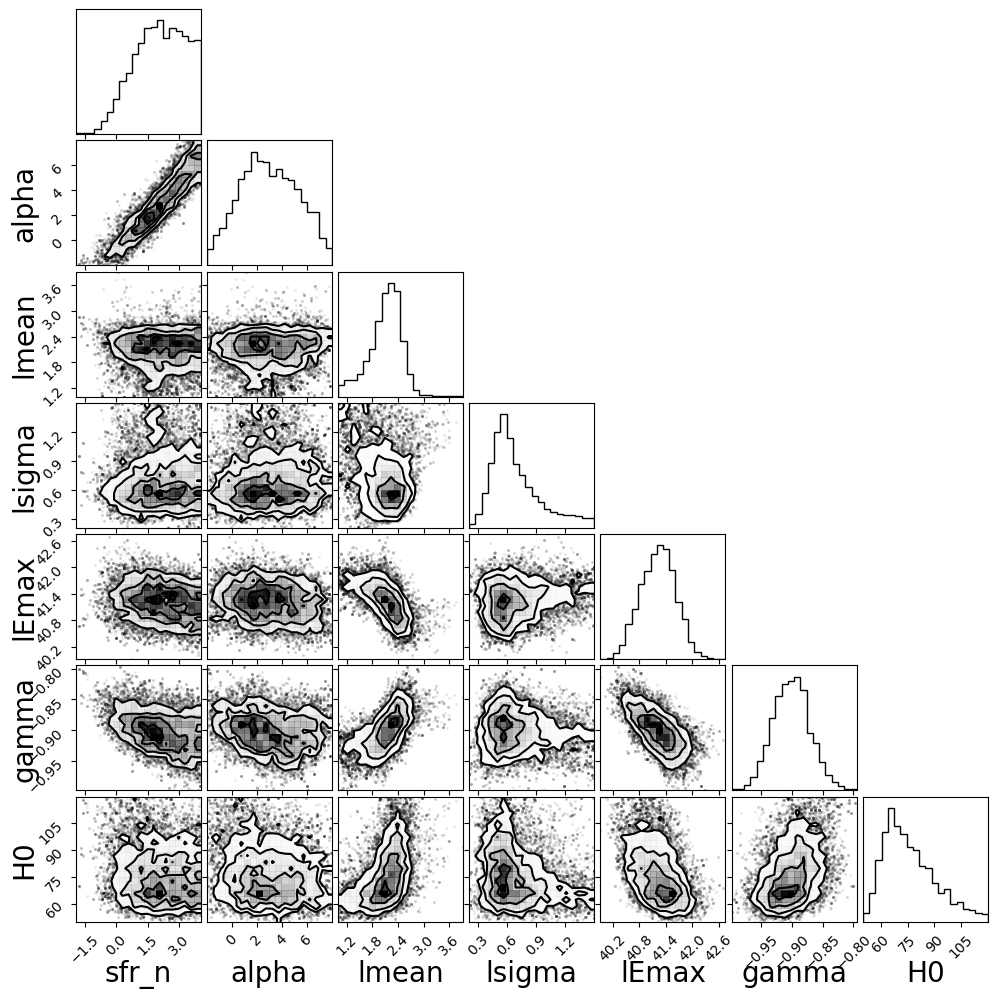

In [4]:
fig = plt.figure(figsize=(10,10))
corner.corner(posterior_sample.T,labels=labels, show_titles=False, fig=fig,title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 20});